### 데이터 분석 Test 김힘찬 <hr>
- 종, 섬, 성별에 따른 신체 특성 차이 분석
- 전처리 -> 탐색 -> 분석 -> 인사이트 도출
- 신체 특성 : 부리길이, 부리 깊이, 날개 길이, 몸무게
    - 종, 섬, 성별 에 따른 신체 길이 => 산점도로 표현(종마다 색 다르게)


In [1]:
## 모듈 로딩
import pandas as pd 
import matplotlib.pyplot as plt
import koreanize_matplotlib

### 데이터 로딩 및 처리 <hr>

In [14]:
## 데이터 가져오기 및 체크
origin = pd.read_csv('./penguins.csv')

## head, info, describe
# display(origin.head())
# origin.info() ## 결측치 발견
# origin.describe() ## 분산, 최대/최소 확인

## 이상치 확인 ==> 없음
# for col in origin.columns : 
#     print(f'[{col}] ----------- {origin[col].nunique()}개 ')
#     print(origin[col].unique())

## 성별 결측치는 삭제 (대체 불가)
dataDF = origin.dropna(subset=['sex'])
dataDF.info() ## --> 결측치 없어짐



<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


### [데이터 탐색 및 분석]<hr>

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.85,18.40,190.0,3700.0
Chinstrap,49.55,18.45,196.0,3700.0
Gentoo,47.40,15.00,216.0,5050.0


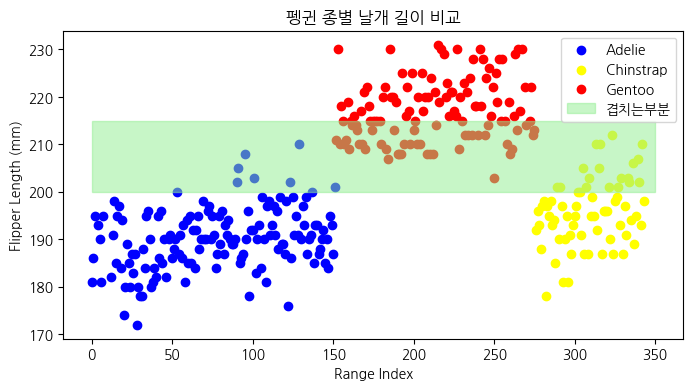

In [57]:
## 1차 분석 : 하나의 신체 특징으로 종을 구별해보자!!
grouped = dataDF.groupby(by='species')

## 종별 신체 특성 비교 : 어떤 값이 좋을까?? 
display(grouped[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g' ]].mean())
display(grouped[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g' ]].median())

## 분석
## - 부리 길이 : adelie만 약 10cm 작음, 나머지 차이 없음
## - 부리 깊이 : gentoo만 약 4cm 작음, 나머지 차이 없음
## - 날개 길이 : gentoo만 약 20cm 넘게 큼, adelie 보단 chinstrap이 좀더 큼
## - 몸 무 게 : gentoo가 압도적으로 큼

## 종별로 구별 했을때 날개의 길이가 가장 확실한 구분법이 될 것 같음
## 확인 --> 산점도 그래프 그려보기 (종별로 색 다르게)

## 공통 그래프 설정
plt.figure(figsize=(8,4))
plt.title('펭귄 종별 날개 길이 비교')
plt.xlabel('Range Index')
plt.ylabel('Flipper Length (mm)')


plt.scatter(grouped.get_group('Adelie').index, 
            grouped.get_group('Adelie')['flipper_length_mm'], 
            label='Adelie', color='blue')
plt.scatter(grouped.get_group('Chinstrap').index, 
            grouped.get_group('Chinstrap')['flipper_length_mm'], 
            label='Chinstrap', color='yellow')
plt.scatter(grouped.get_group('Gentoo').index, 
            grouped.get_group('Gentoo')['flipper_length_mm'], 
            label='Gentoo', color='red')

plt.fill([0, 350, 350, 0],[200,200, 215, 215], color='lightgreen', alpha=0.5,label ="겹치는부분")  ## 겹치는 부분 

plt.legend()
plt.show()



## 결론 ! 실패 : 종별로 구별이 잘 안됨 ㅠㅠ! 겹치는 부분이 많음


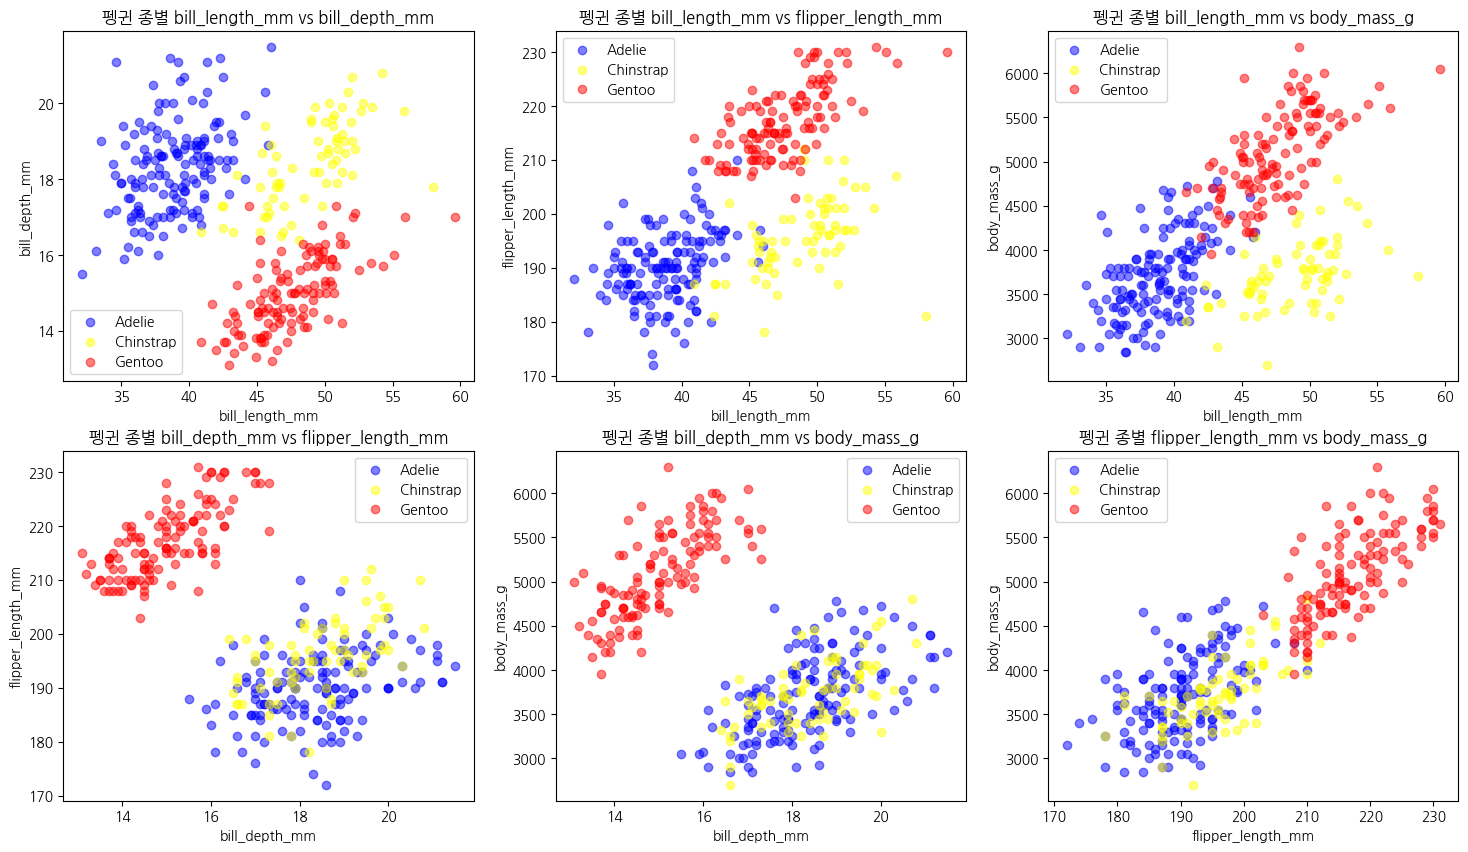

In [ ]:
## 2차 분석 : 2개의 특징을 종을 구별해보자

## 모든 경우의 수의 삼전도를 그려보기

features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g' ]
idx = 1

## 중복을 막기위해 j는 i + 1부터 시작함

plt.figure(figsize=(18,10))
for i in range(len(features)):
    for j in range(i+1, len(features)):
        plt.subplot(2,3,idx)
        plt.title(f'펭귄 종별 {features[i]} vs {features[j]}')
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        plt.scatter(grouped.get_group('Adelie')[features[i]], 
                    grouped.get_group('Adelie')[features[j]], 
                    label='Adelie', color='blue', alpha=0.5)
        plt.scatter(grouped.get_group('Chinstrap')[features[i]], 
                    grouped.get_group('Chinstrap')[features[j]], 
                    label='Chinstrap', color='yellow', alpha=0.5)
        plt.scatter(grouped.get_group('Gentoo')[features[i]], 
                    grouped.get_group('Gentoo')[features[j]], 
                    label='Gentoo', color='red', alpha=0.5)
        plt.legend()
        idx+=1

plt.show()
## 결로 : 부리길이 와 부리의 깊이를 이용하면 그나마 정확하게 구별 가능!!

In [68]:
## 3차 분석 : 섬마다 특성 비교

## 종별 섬마다 개체 수 체크
display(dataDF.groupby(by=['island'])['species'].value_counts())
# -> adelie : 3섬 모두 분포 / chinstrap : biscoe 섬에만 분포 / gentoo : biscoe, dream 섬에 분포
## ==> 구별 안됨
# dataDF.groupby(by=['island'])['species'].value_counts().plot(kind='bar')

grouped = dataDF.groupby(by=['island', 'species'])
## (종,섬)과 신체 특성 비교 : 어떤 값이 좋을까??
## 종만 그룹하기에는 섬마다 종류가 조금 다름 
display(grouped[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g' ]].mean())
display(grouped[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g' ]].median())


## ==> 결론 : 섬이 달라도 종이 같다면 4가지 신체 특징 모두 거의 비슷함!!


island     species  
Biscoe     Gentoo       119
           Adelie        44
Dream      Chinstrap     68
           Adelie        55
Torgersen  Adelie        47
Name: count, dtype: int64

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie          38.975000      18.370455         188.795455   
          Gentoo          47.568067      14.996639         217.235294   
Dream     Adelie          38.520000      18.240000         189.927273   
          Chinstrap       48.833824      18.420588         195.823529   
Torgersen Adelie          39.038298      18.451064         191.531915   

                     body_mass_g  
island    species                 
Biscoe    Adelie     3709.659091  
          Gentoo     5092.436975  
Dream     Adelie     3701.363636  
          Chinstrap  3733.088235  
Torgersen Adelie     3708.510638

bill_length_mm  bill_depth_mm  flipper_length_mm  \
island    species                                                       
Biscoe    Adelie              38.70          18.45              189.5   
          Gentoo              47.40          15.00              216.0   
Dream     Adelie              38.80          18.40              190.0   
          Chinstrap           49.55          18.45              196.0   
Torgersen Adelie              39.00          18.40              191.0   

                     body_mass_g  
island    species                 
Biscoe    Adelie          3750.0  
          Gentoo          5050.0  
Dream     Adelie          3600.0  
          Chinstrap       3700.0  
Torgersen Adelie          3700.0

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


C:\Users\kdt008\AppData\Local\Temp\ipykernel_26556\2497437520.py:21: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  ydata1 = grouped.get_group('male')[features[i]].groupby(by=dataDF['species']).mean()
C:\Users\kdt008\AppData\Local\Temp\ipykernel_26556\2497437520.py:22: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  ydata2 = grouped.get_group('female')[features[i]].groupby(by=dataDF['species']).mean()
C:\Users\kdt008\AppData\Local\Temp\ipykernel_26556\2497437520.py:21: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  ydata1 = grouped.get_gro

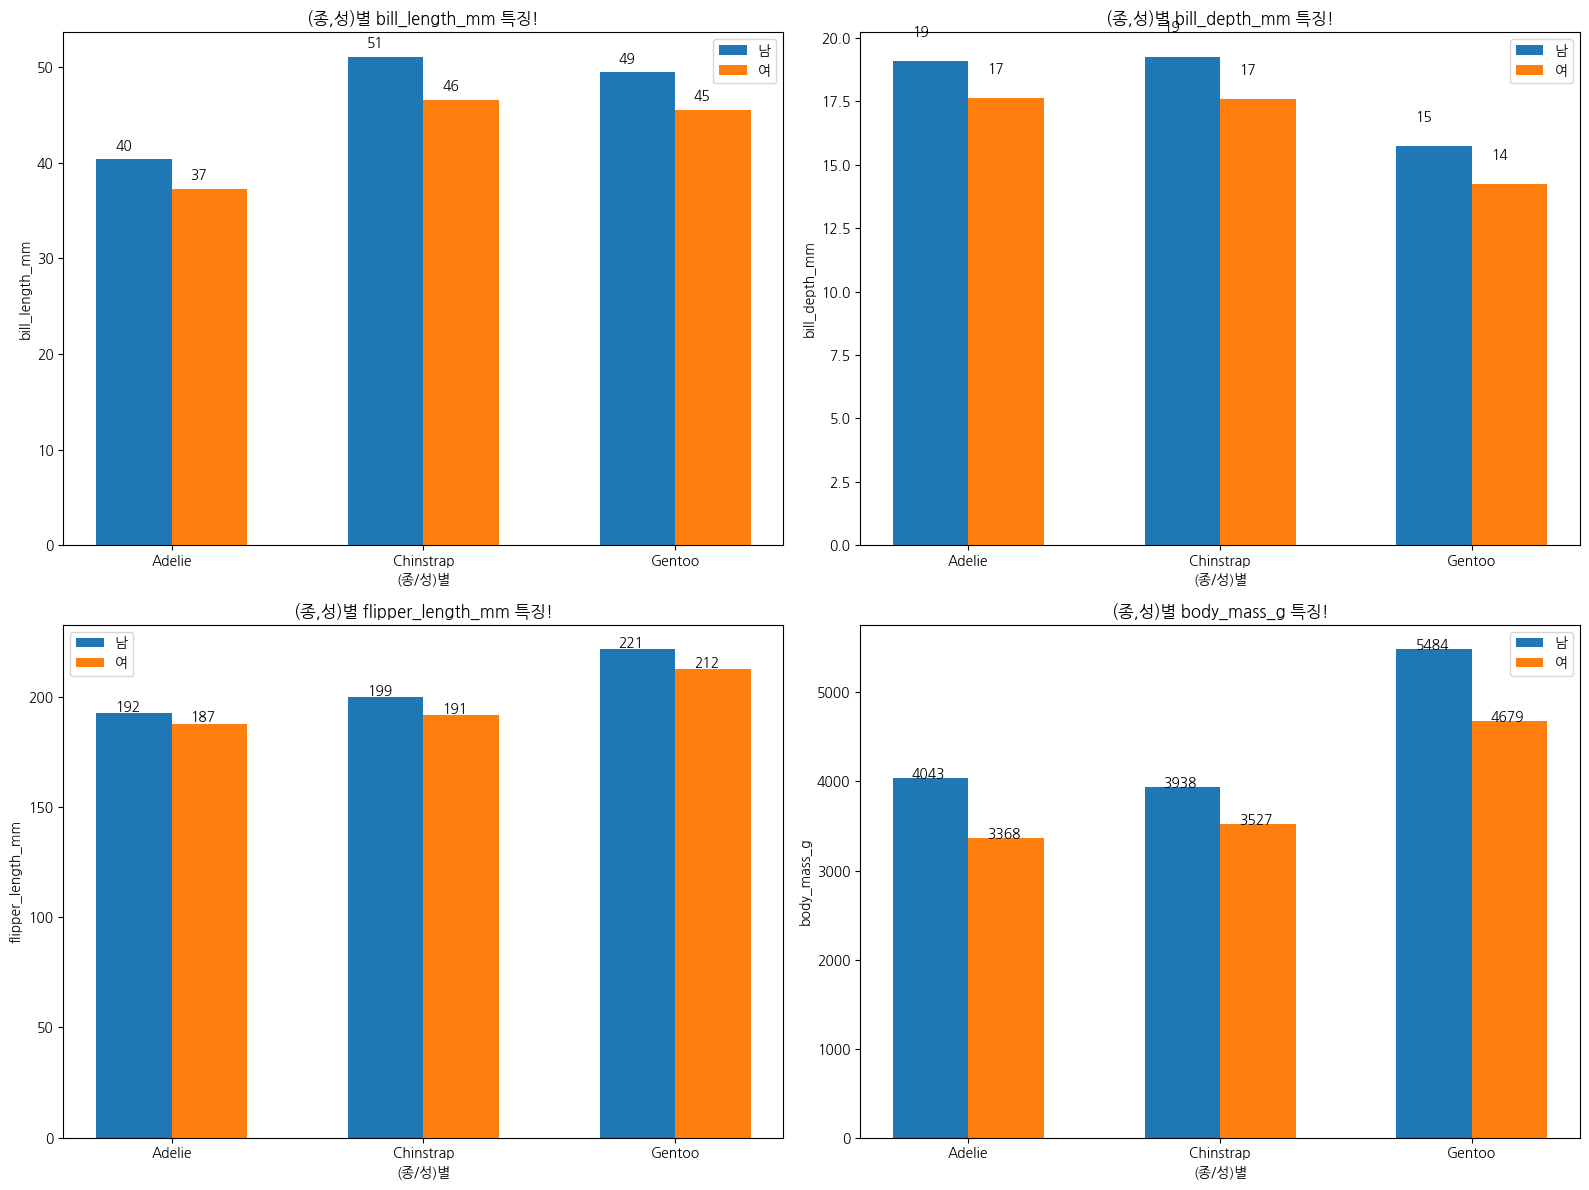

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
female,4.903476,1.795681,12.500776,666.172050
male,5.366896,1.863351,14.547876,787.628884


In [118]:
## 4차 성별과 신체 특징의 관계
## 막대그래프 이용
## x 인덱스 : 종
## y 인덱스 : 남녀 신체 특징
## 그래프 총 4개 (특징 별로)

display(dataDF)
features = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g' ]

plt.figure(figsize = (16, 12))

idx = 1
for i in range(len(features)) :
    
    xdata = pd.Series(range(3))
    ## (종,성)별 로 나누기
    # grouped = dataDF.groupby(by=['species','sex'])
    ## 종별 성별 신체 특징 평균
    ## 특정 성별의 신체 특징 평균 가져오기
    grouped = dataDF.groupby(by=['sex'])
    ydata1 = grouped.get_group('male')[features[i]].groupby(by=dataDF['species']).mean()
    ydata2 = grouped.get_group('female')[features[i]].groupby(by=dataDF['species']).mean()
    # display(ydata1, ydata2)
    
    
    # ydata1 = grouped['sex']
    # print(ydata1)
    # ydata1 = dataDF.groupby(by=['species','sex']).get_group(('Adelie','Male'))[features[i]].mean()
    # ydata1 = dataDF.groupby(by=['species','sex']).get_group(('Adelie','FeMale'))[features[i]].mean()
    ## 왜 안 되는거지.ㄴㅁㅇㄻㄴㅇㄻㄴㅇ...
    # ydata1 = dataDF.groupby(by=['species']).get_group('Adelie')[features[i]].mean()
    # print(ydata1)
    # ydata2 = dataDF.groupby(by=['species']).get_group('Chinstrap')[features[i]].mean()
    # ydata3 = dataDF.groupby(by=['species']).get_group('Gentoo')[features[i]].mean()
    
    w = 0.3
    plt.subplot(2,2,idx)
    # bar1 = plt.bar(xdata, ydata1, width= w, label='Adelie')
    bar1 = plt.bar(xdata-w/2, ydata1, width= w)
    bar2 = plt.bar(xdata+w/2, ydata2, width= w)
    # bar3 = plt.bar(xdata+w*2, ydata3, width= w)
    
    for rect in bar1 :
        h, w, x = rect.get_height(), rect.get_width(), rect.get_x()
        plt.text(x+w/4, h+1, f'{int(h)}')
    ## 여자 막대 수치 넣기
    for rect in bar2 :
        h, w, x = rect.get_height(), rect.get_width(), rect.get_x()
        plt.text(x+w/4, h+1, f'{int(h)}')
    
    ## 공통부분
    plt.title(f'(종,성)별 {features[i]} 특징!')
    plt.legend(['남', '여'])
    plt.xticks(range(3), ['Adelie', 'Chinstrap', 'Gentoo'])
    plt.xlabel('(종/성)별')
    plt.ylabel(f'{features[i]}')
    plt.tight_layout()
    idx += 1

plt.show()

display(grouped[['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g' ]].std())



## 4차 결론 
# 1. 모든 종은 수컷이 암컷보다 신체 특징이 더 큼
# 2. 허나 그차이가 미미하여 4개의 신체조건으로는 성별, 종 구별이 힘듦

## [인사이트? 도출]

- 1. 펭귄을 구별하기 위해선 부리길이 와 부리의 깊이를 이용해야 그나마 정확하게 구별 가능하다!
- 2. 서식지의 분포는 펭귄의 종마다 모드 다르며, 섬은 달라도 종이 같다면 신체적 특징이 비슷하다!
- 3. 펭귄은 남녀의 신체 특징 차이가 있지만 각 특징의 std값을 고려한다면 구별하기 힘들다!